<a href="https://colab.research.google.com/github/johandipto/6220-Project/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.0

Import Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.0.3
Seaborn version:  0.13.1


**Dataset:**

The “Heart Disease Prediction” used for Principal Component Analysis (PCA) and classification models is obtained from GitHub. The data set provides information about Heart Disease Prediction. The Project is to make predictions on whether a person is suffering from Heart Disease or not

All attributes are numerical and they are listed below:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/dataset.csv')
df.head(100)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1


In [ ]:
len(df.index)

303

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  1


In [ ]:
df = df.drop_duplicates()

In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


In [ ]:
 #columns_to_drop = df['restecg','thalach','exang','oldpeak','slope','ca','thal']

df.drop(['thalach','exang','oldpeak','slope','ca','thal'], axis=1, inplace=True)

#y = df["restecg"]
#X = df.drop(labels='restecg', axis=1)
#df.drop(['restecg'], axis=1, inplace=True)

**Exploratory Data Analysis**

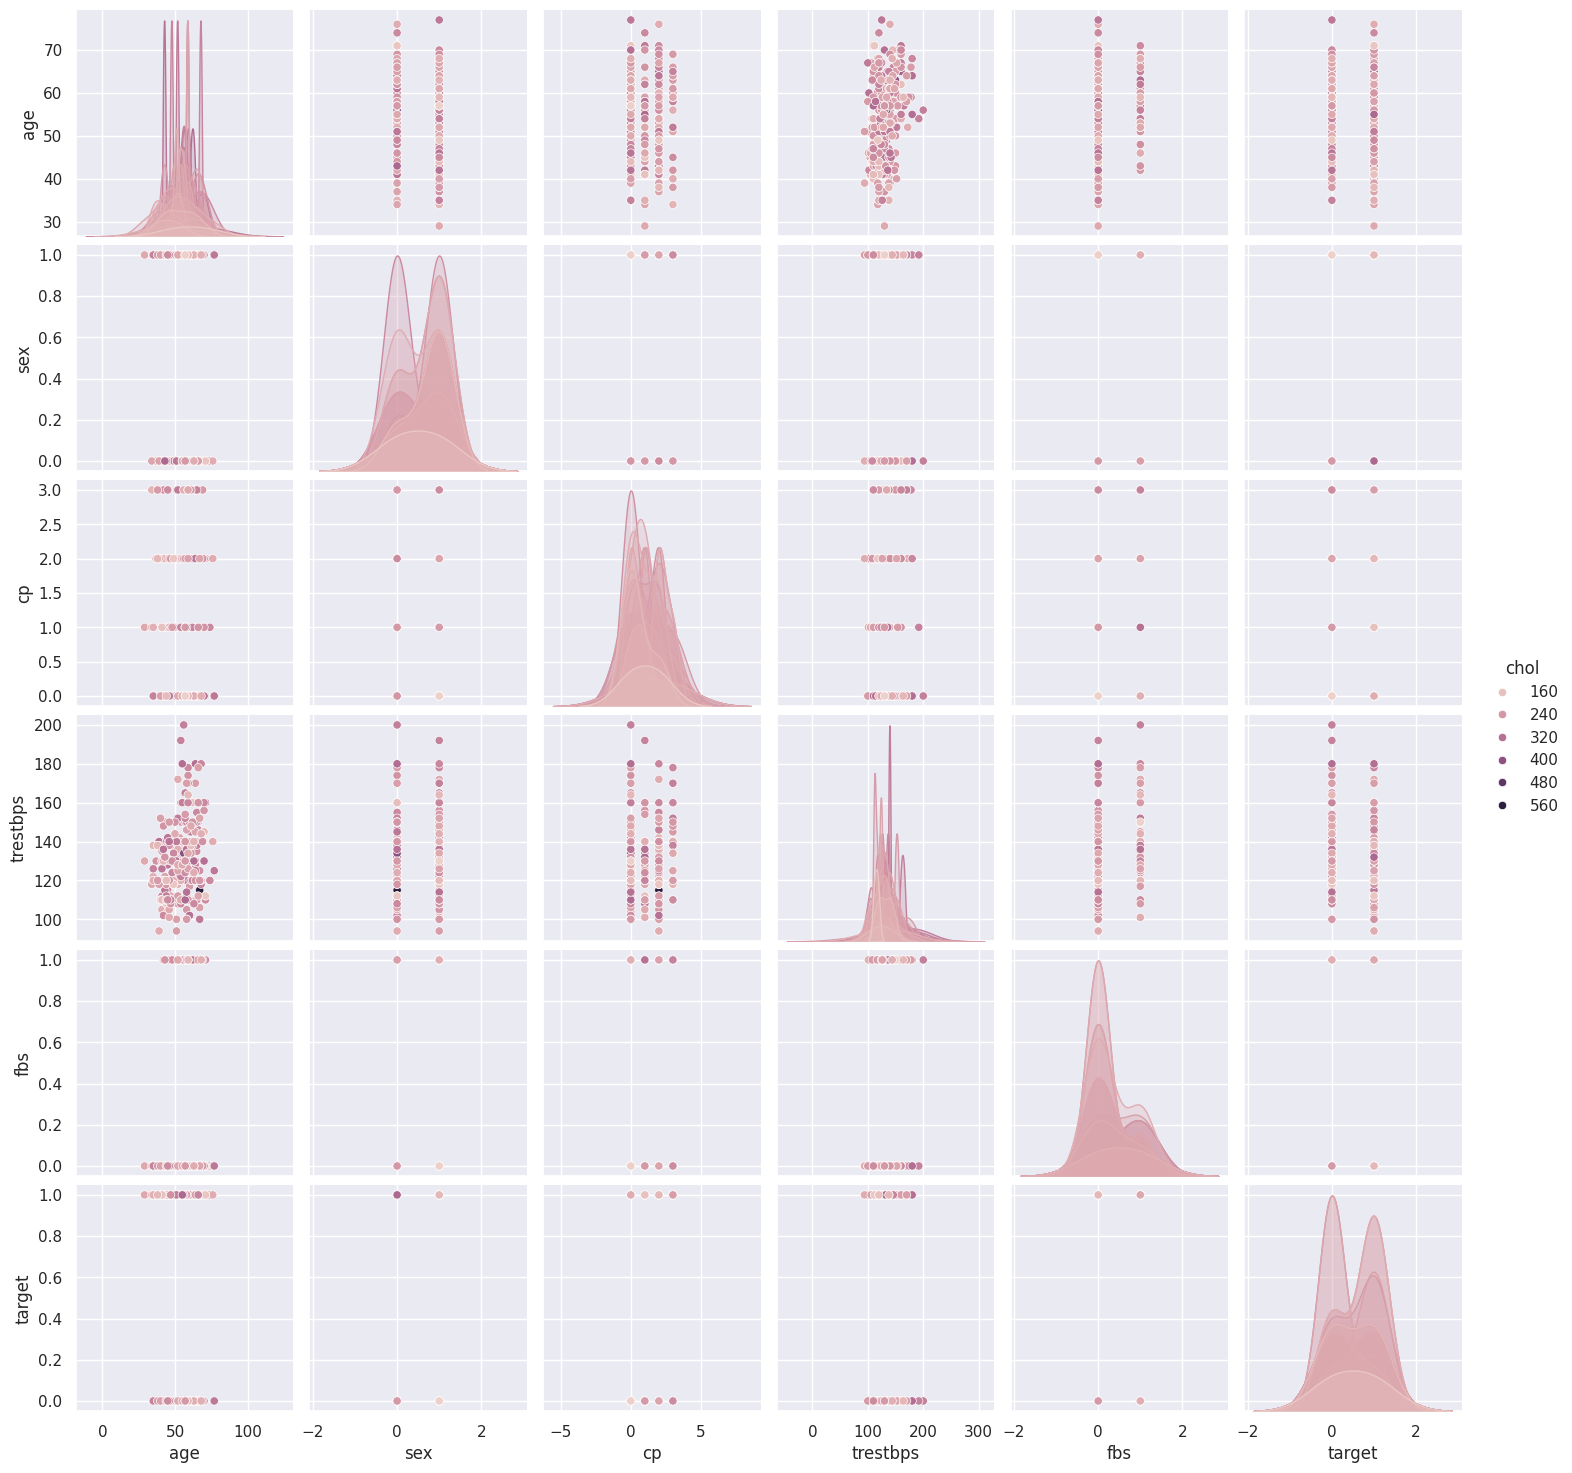

In [ ]:
sns.pairplot(df, hue='chol')
plt.show()

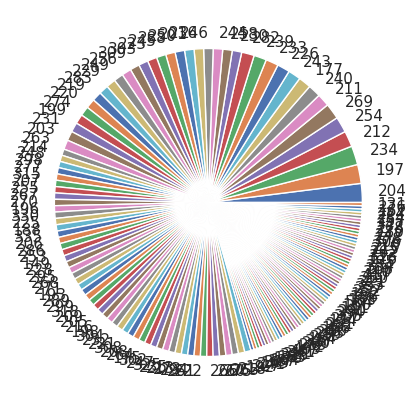

In [ ]:
y =df['chol']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['chol'])
X.head(500)

,age,sex,cp,trestbps,fbs,target
0,63,1,3,145,1,1
1,37,1,2,130,0,1
2,41,0,1,130,0,1
3,56,1,1,120,0,1
4,57,0,0,120,0,1
...,...,...,...,...,...,...
298,57,0,0,140,0,0
299,45,1,3,110,0,0
300,68,1,0,144,1,0
301,57,1,0,130,0,0


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.0,55.5,61.0,77.0
sex,302.0,0.682119,0.466426,0.0,0.0,1.0,1.0,1.0
cp,302.0,0.963576,1.032044,0.0,0.0,1.0,2.0,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.0,130.0,140.0,200.0
fbs,302.0,0.149007,0.356686,0.0,0.0,0.0,0.0,1.0
target,302.0,0.543046,0.498970,0.0,0.0,1.0,1.0,1.0


**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,age,sex,cp,trestbps,fbs,target
0,0.949794,0.682656,1.976470,0.764066,2.389793,0.917313
1,-1.928548,0.682656,1.005911,-0.091401,-0.418446,0.917313
2,-1.485726,-1.464866,0.035352,-0.091401,-0.418446,0.917313
3,0.174856,0.682656,0.035352,-0.661712,-0.418446,0.917313
4,0.285561,-1.464866,-0.935208,-0.661712,-0.418446,0.917313
5,0.285561,0.682656,-0.935208,0.478910,-0.418446,0.917313
6,0.174856,-1.464866,0.035352,0.478910,-0.418446,0.917313
7,-1.153610,0.682656,0.035352,-0.661712,-0.418446,0.917313
8,-0.267966,0.682656,1.005911,2.303906,2.389793,0.917313
9,0.285561,0.682656,1.005911,1.049221,-0.418446,0.917313


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,302.0,-2.588070e-16,1.00166,-2.814192,-0.710788,0.119503,0.728383,2.499671
sex,302.0,-1.176395e-16,1.00166,-1.464866,-1.464866,0.682656,0.682656,0.682656
cp,302.0,-1.411674e-16,1.00166,-0.935208,-0.935208,0.035352,1.005911,1.976470
trestbps,302.0,-7.058372e-16,1.00166,-2.144521,-0.661712,-0.091401,0.478910,3.900776
fbs,302.0,2.352791e-17,1.00166,-0.418446,-0.418446,-0.418446,-0.418446,2.389793
target,302.0,0.000000e+00,1.00166,-1.090140,-1.090140,0.917313,0.917313,0.917313


**Observations and variables**

In [ ]:

observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

<ipython-input-82-774acb9c9bc7>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


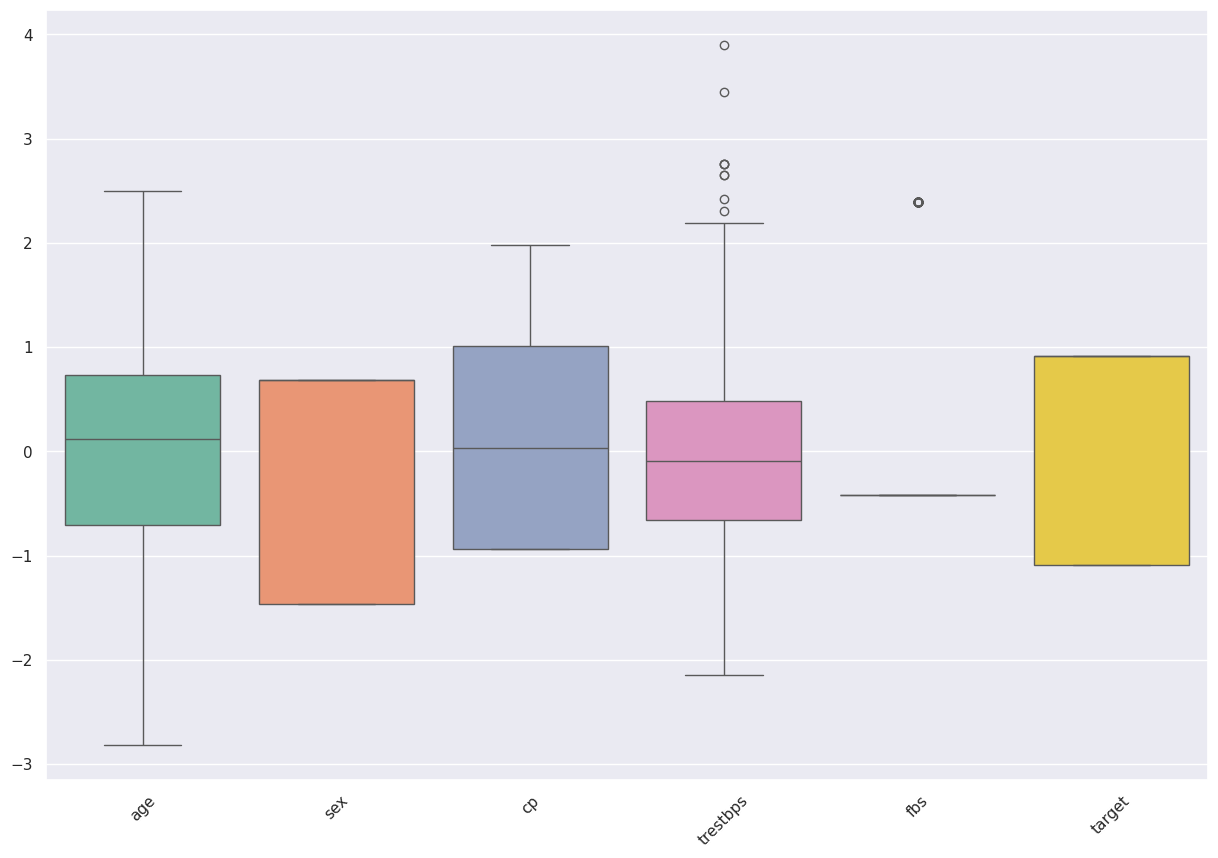

In [ ]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

<ipython-input-83-9a5ad5537f73>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


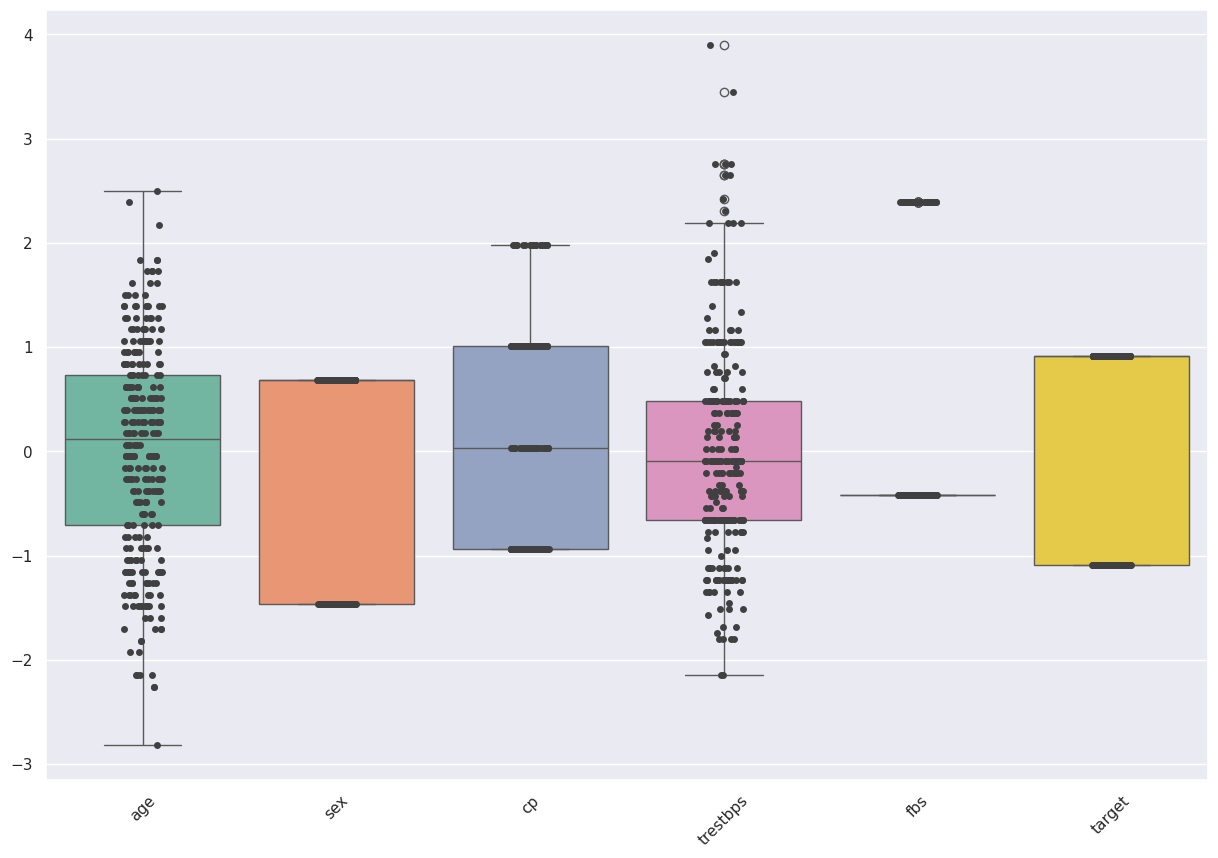

In [ ]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

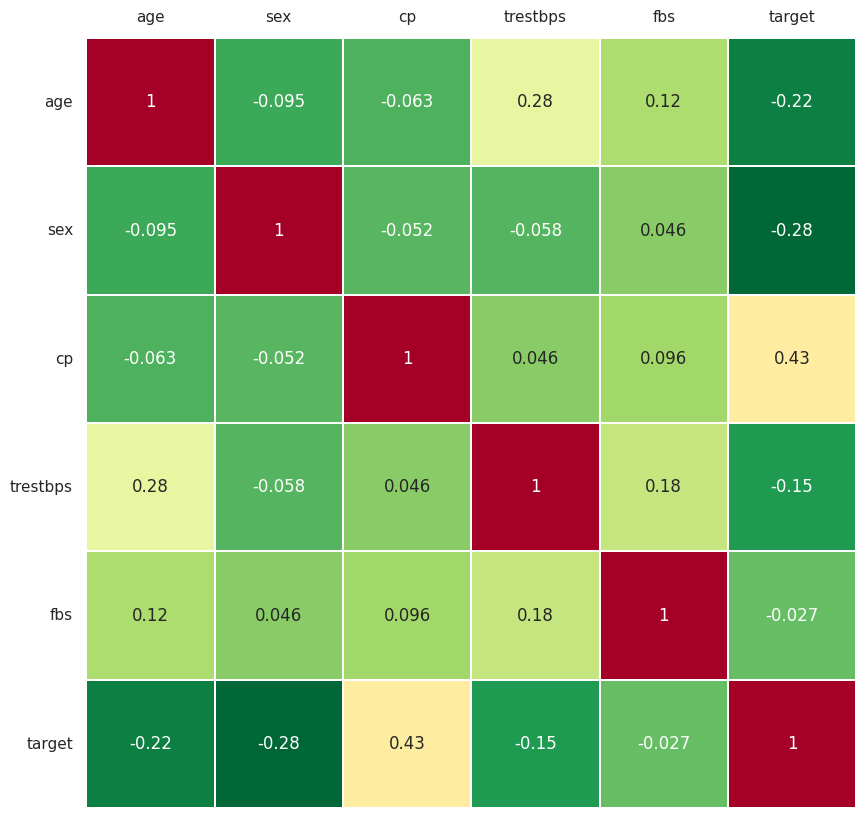

In [ ]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

In [ ]:
pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.7 MB/s eta 0:00:00


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [ ]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.376889,2.600495,2.197695,0.145747,-0.781755,-0.209932
1,1.774693,-0.719827,1.108115,-0.659043,0.944354,0.018445
2,1.684780,-0.152831,-0.864836,0.532388,1.197404,0.228879
3,0.644551,-0.493965,0.186655,-0.308463,-0.691381,-0.827539
4,0.690386,-0.072066,-1.694145,0.929173,-0.203035,-0.547610
...,...,...,...,...,...,...
297,-0.989683,0.117200,-1.635678,0.418829,0.588833,0.709971
298,0.910977,-1.003417,1.263843,-0.812252,-0.590916,1.974469
299,-2.504080,1.231842,1.088138,1.285794,-0.486484,-0.371744
300,-1.351175,-0.949421,-0.123431,-0.190995,-0.123470,0.001029


**Scatter Plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '6 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (27.1% expl.var)', ylabel='PC2 (23.0% expl.var)'>)

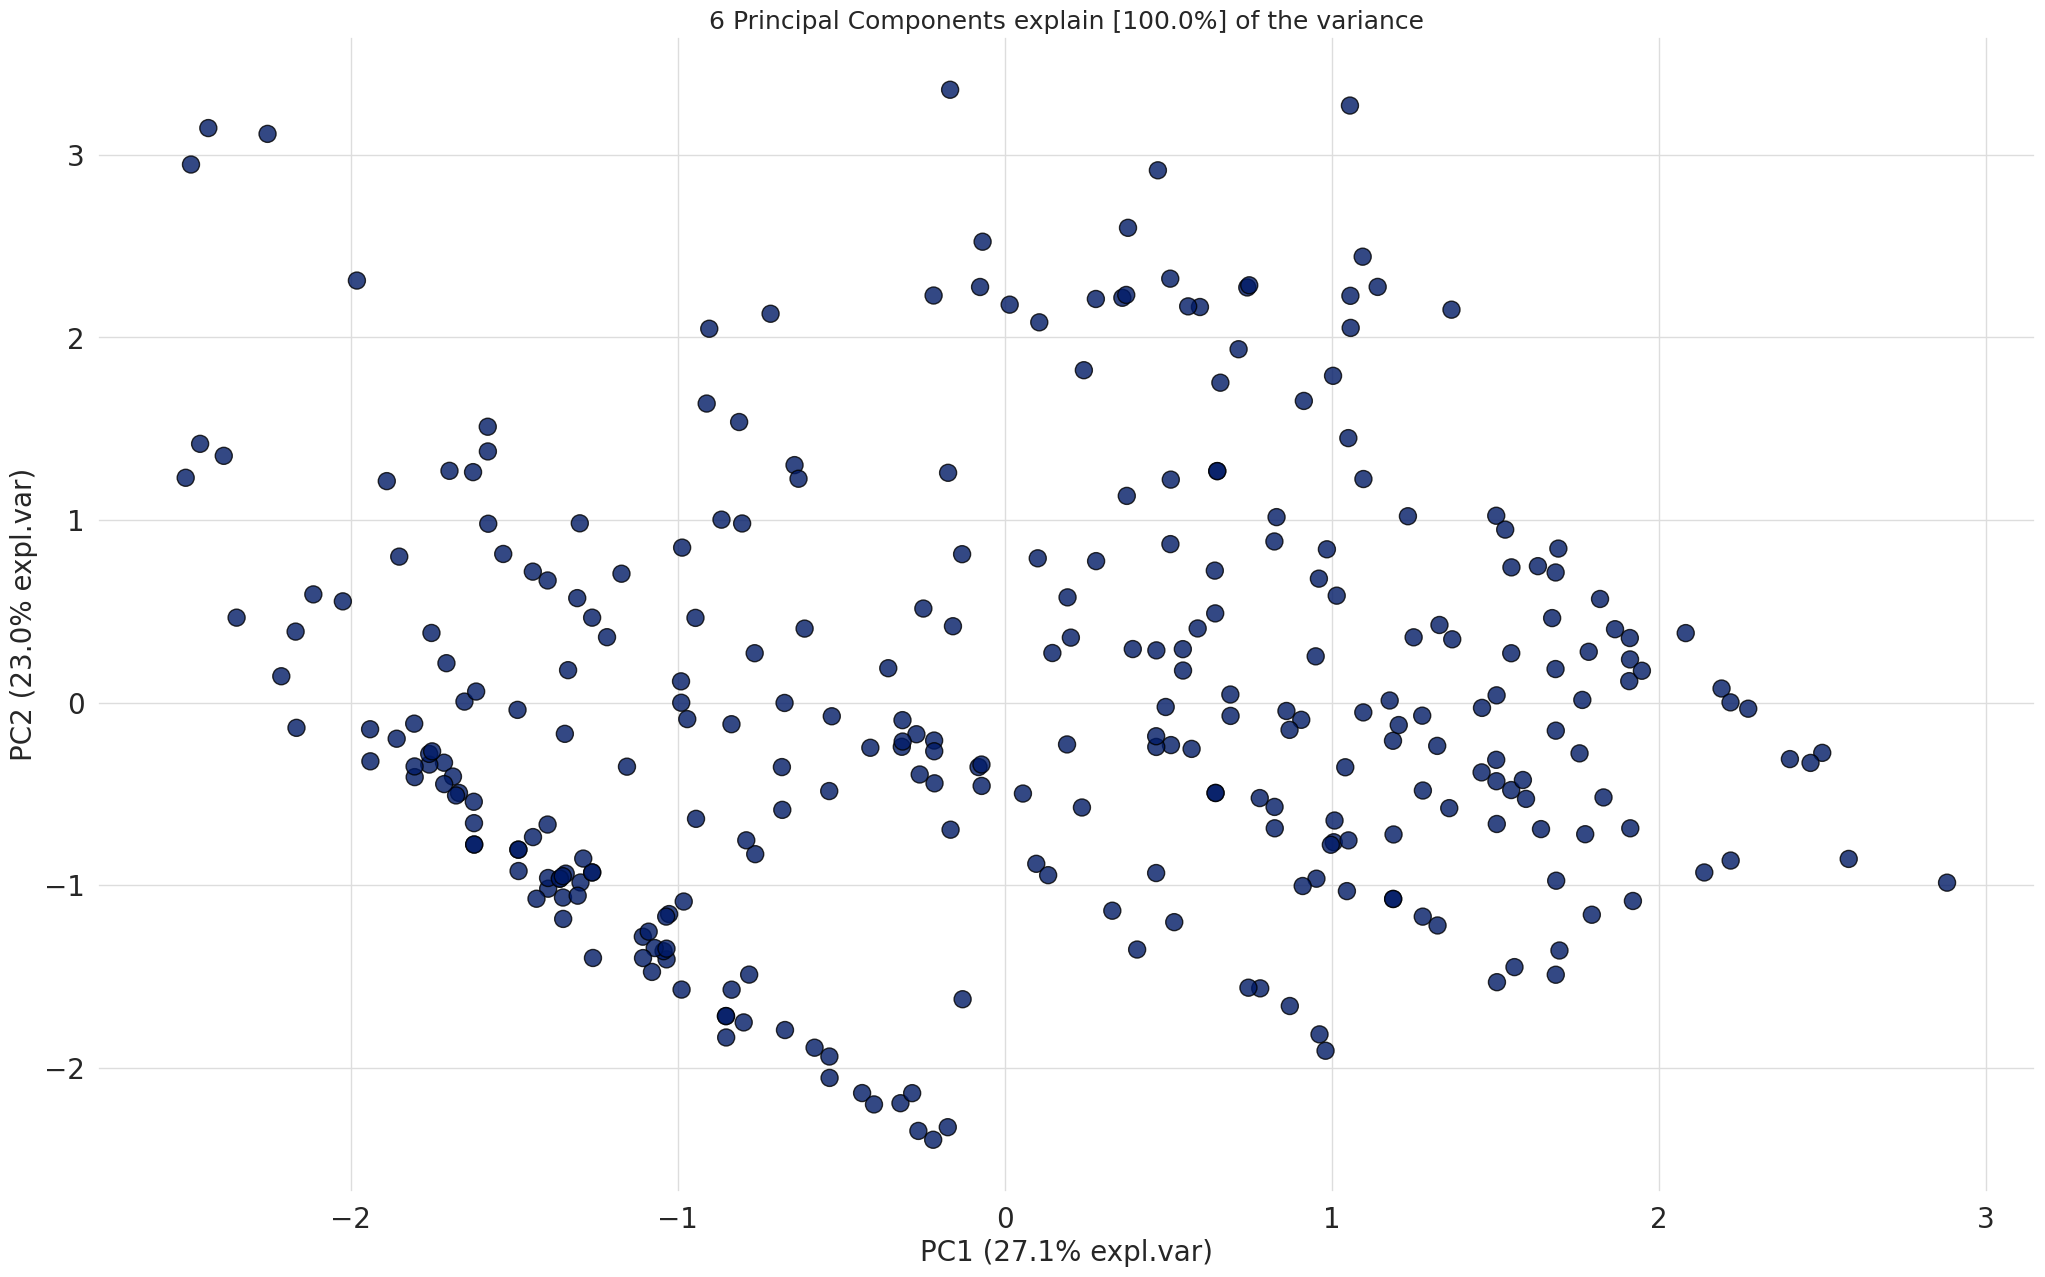

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T
A

,PC1,PC2,PC3,PC4,PC5,PC6
age,-0.408734,0.436887,-0.277466,-0.139124,-0.708476,-0.209250
sex,-0.252886,-0.352056,0.703701,-0.388604,-0.159841,-0.374630
cp,0.465707,0.394117,0.349148,-0.431196,-0.230296,0.516641
trestbps,-0.318400,0.544570,-0.001810,-0.394018,0.647088,-0.167598
fbs,-0.142774,0.432455,0.552268,0.698234,-0.006025,0.005647
target,0.656002,0.215139,-0.030153,0.030346,-0.026793,-0.721684


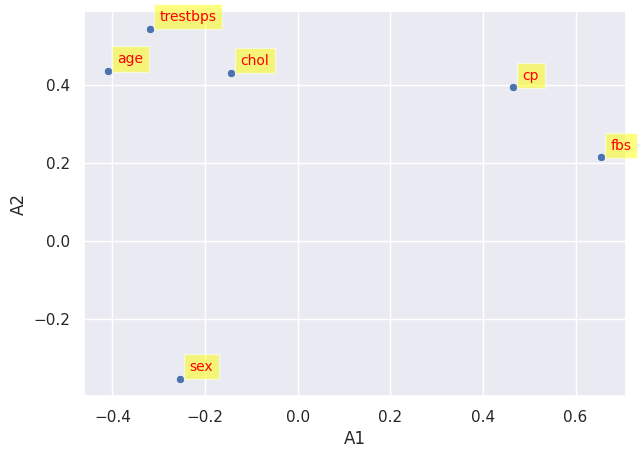

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

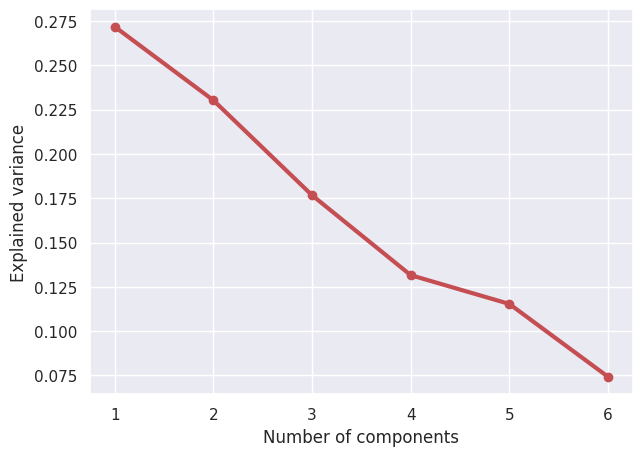

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

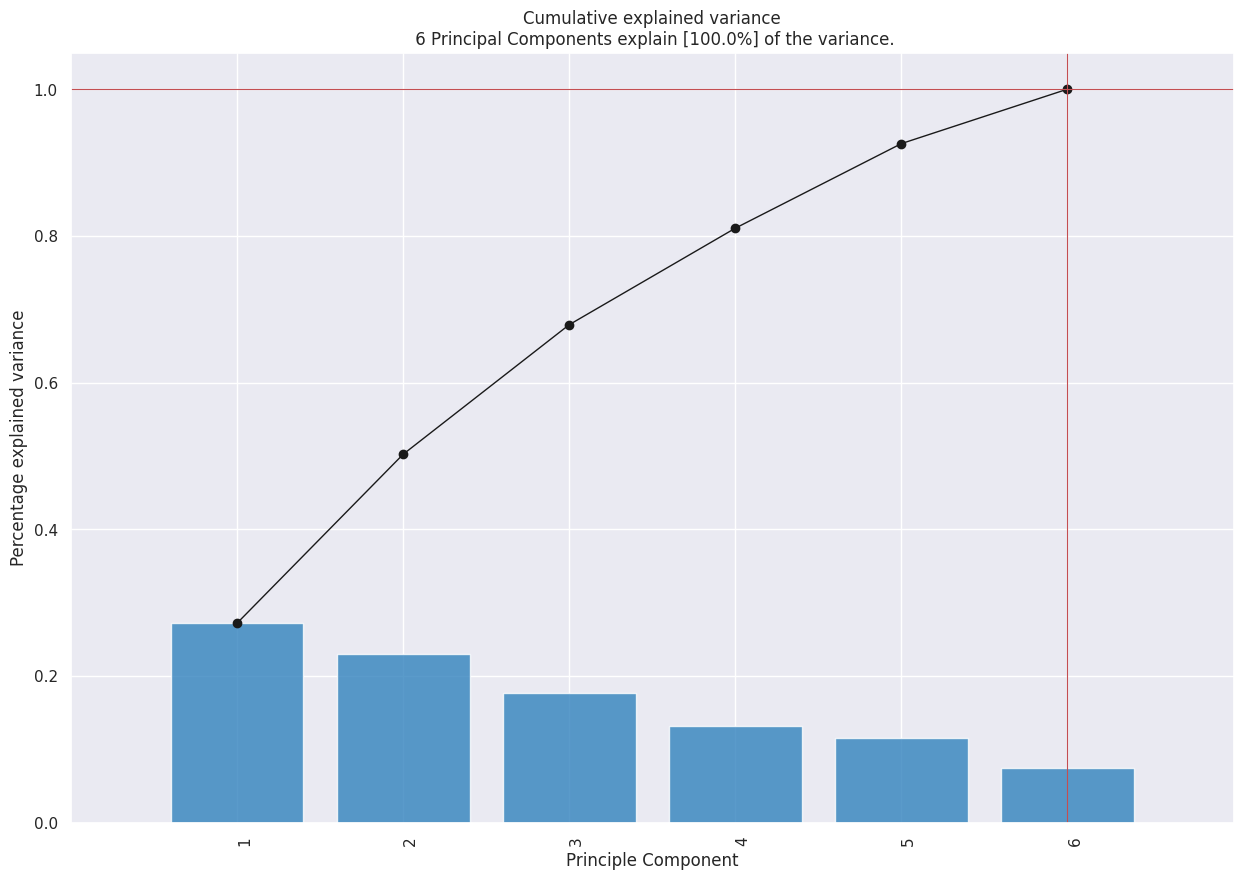

In [ ]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '6 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (27.1% expl.var)', ylabel='PC2 (23.0% expl.var)'>)

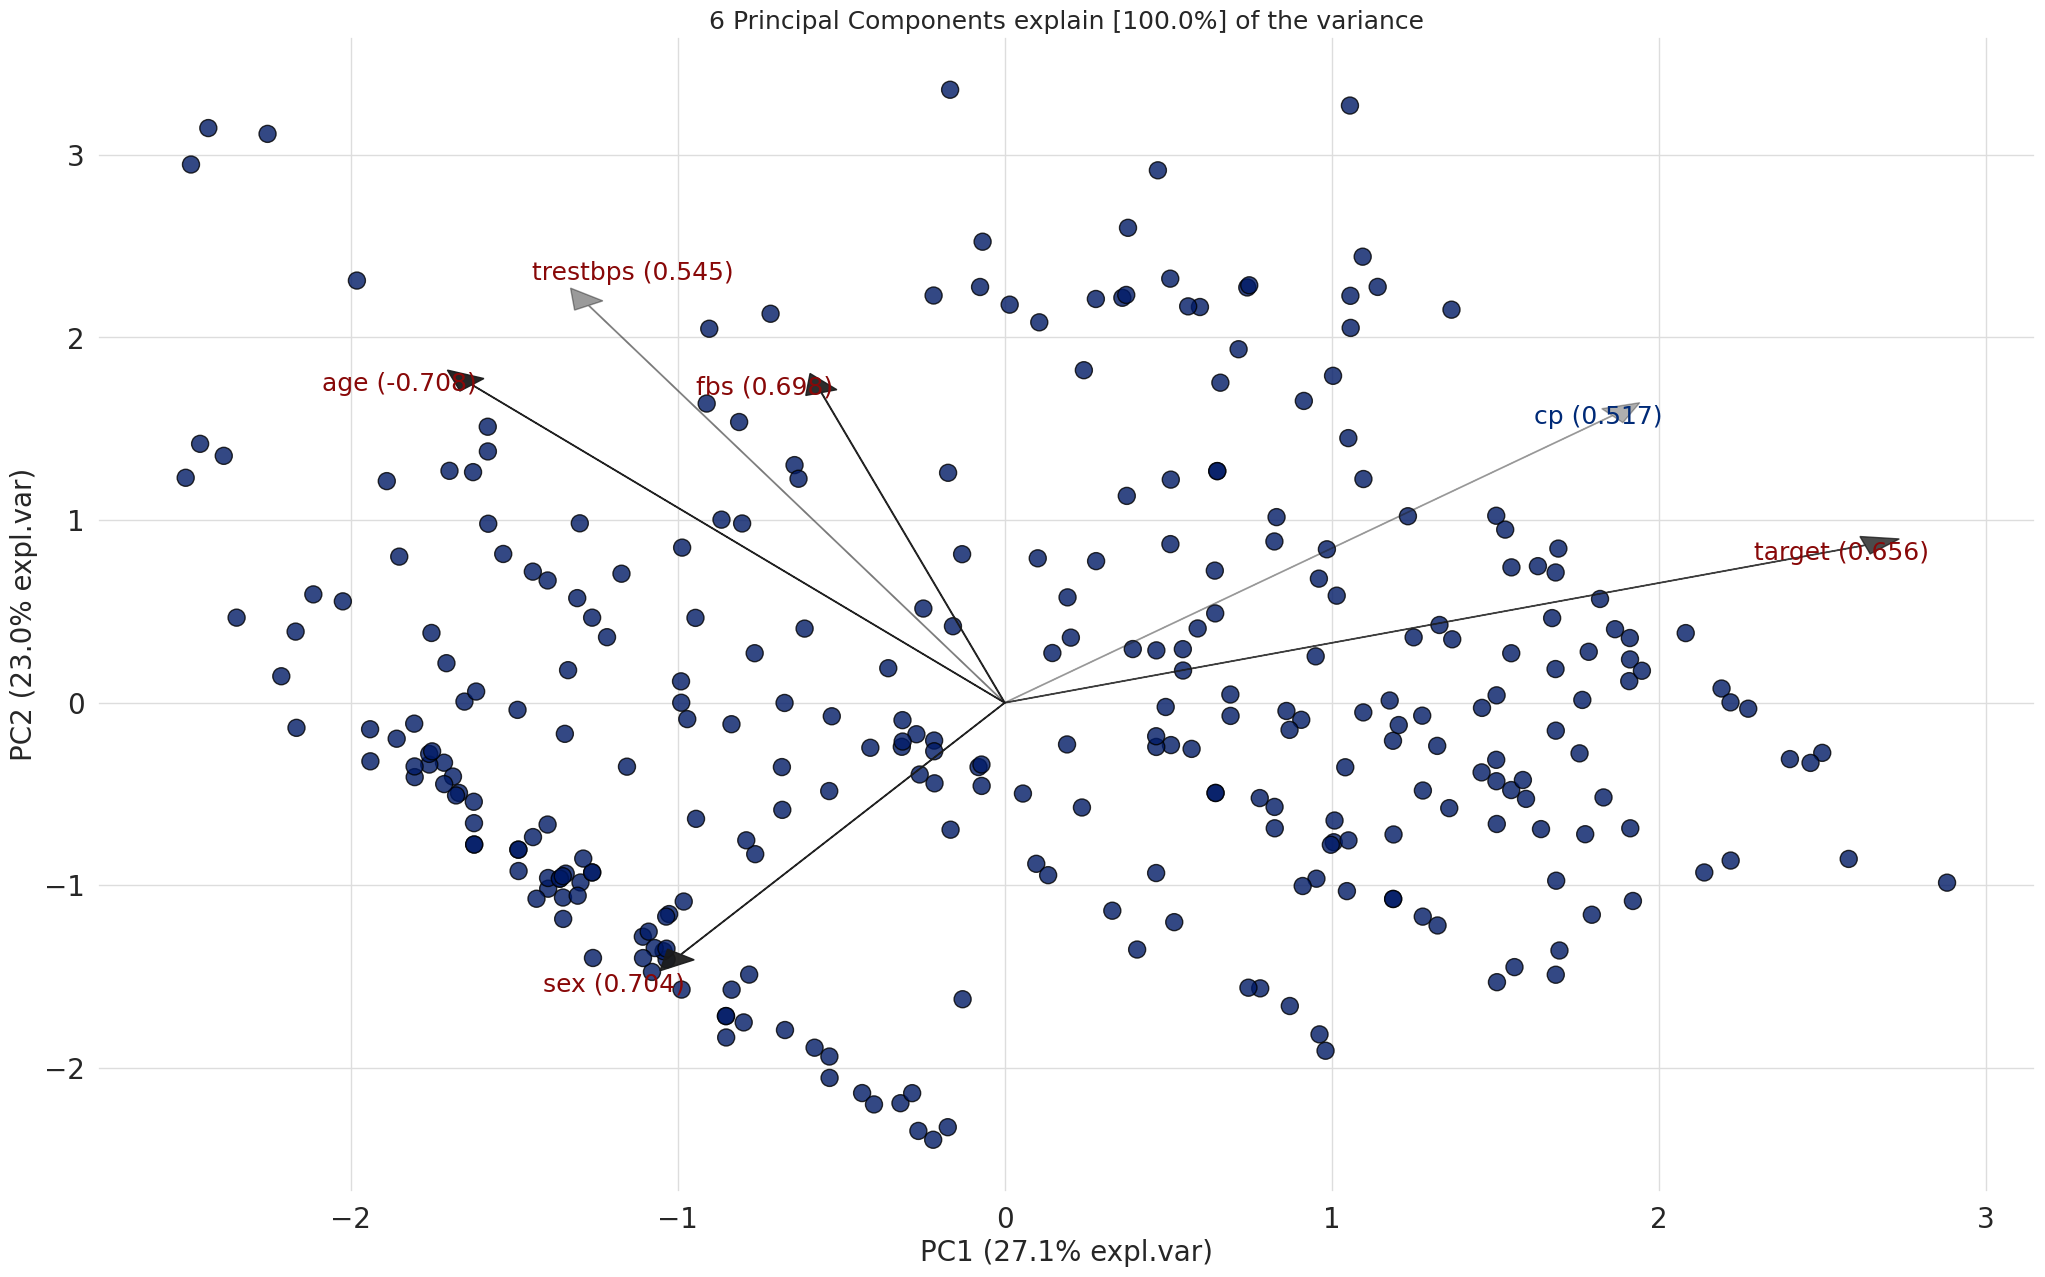

In [ ]:
model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '6 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (27.1% expl.var)', ylabel='PC2 (23.0% expl.var)', zlabel='PC3 (17.6% expl.var)'>)

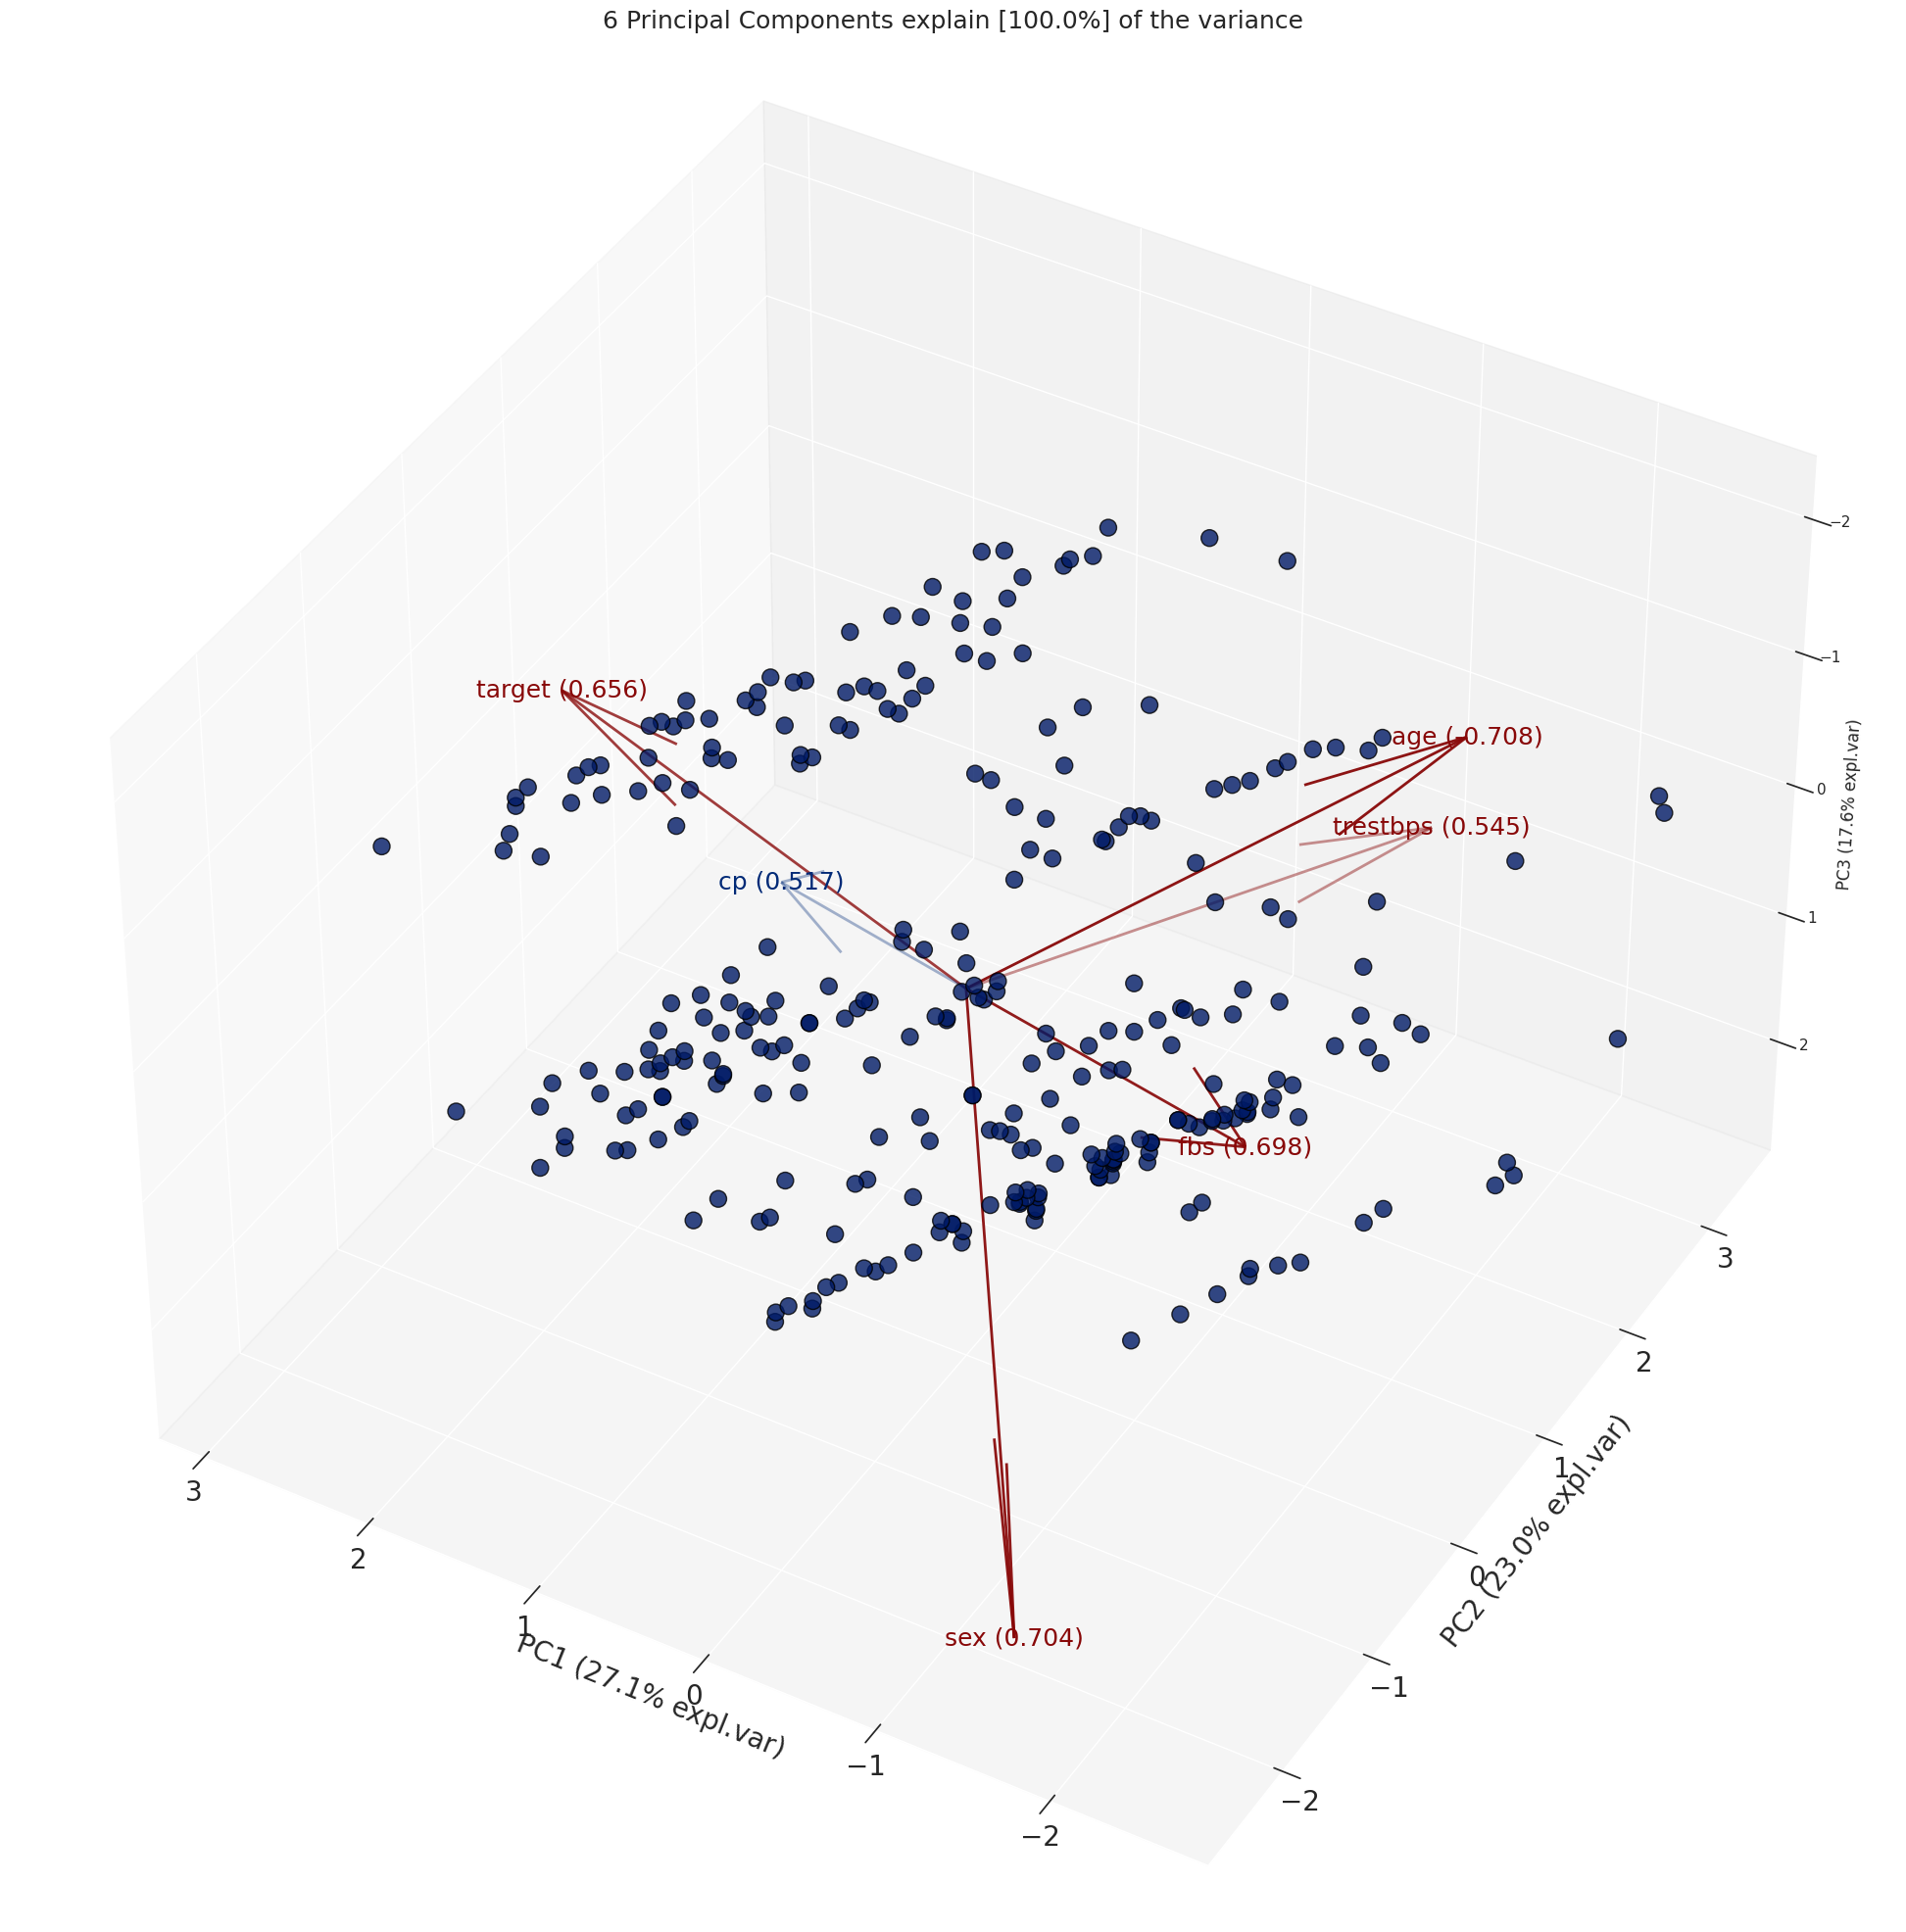

In [ ]:
model.biplot3d(legend=False)

**Classification + PCA**

In [ ]:

from pycaret.utils import version
version()

'3.3.2'

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (272, 7)
Unseen Data For Predictions: (30, 7)


In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='cp', train_size=0.7, session_id=123, normalize = True, pca = True)

,Description,Value
0,Session id,123
1,Target,cp
2,Target type,Multiclass
3,Original data shape,"(272, 7)"
4,Transformed data shape,"(272, 7)"
5,Transformed train set shape,"(190, 7)"
6,Transformed test set shape,"(82, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


**Comparing All Models**

In [ ]:
#show the best model and their statistics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.5737,0.0000,0.5737,0.5034,0.5179,0.3280,0.3626,0.0430
lr,Logistic Regression,0.5632,0.0000,0.5632,0.5047,0.5193,0.3176,0.3371,1.0750
lda,Linear Discriminant Analysis,0.5632,0.0000,0.5632,0.5380,0.5335,0.3273,0.3449,0.0410
nb,Naive Bayes,0.5474,0.7161,0.5474,0.5565,0.5388,0.3242,0.3320,0.0460
knn,K Neighbors Classifier,0.5263,0.6836,0.5263,0.4691,0.4871,0.2378,0.2467,0.0610
qda,Quadratic Discriminant Analysis,0.5158,0.0000,0.5158,0.5125,0.4951,0.2691,0.2802,0.0440
rf,Random Forest Classifier,0.5105,0.6868,0.5105,0.4480,0.4705,0.2094,0.2176,0.2270
et,Extra Trees Classifier,0.5000,0.6713,0.5000,0.4499,0.4664,0.2051,0.2122,0.1840
gbc,Gradient Boosting Classifier,0.4895,0.0000,0.4895,0.4457,0.4597,0.2048,0.2114,0.6830
lightgbm,Light Gradient Boosting Machine,0.4895,0.6817,0.4895,0.4644,0.4706,0.2106,0.2151,0.3330


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

**Create a Model**

**Random Forest Classifier**

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4211,0.6541,0.4211,0.3876,0.4035,0.0369,0.0371
1,0.4737,0.6199,0.4737,0.3892,0.4273,0.1630,0.1687
2,0.5263,0.6378,0.5263,0.5818,0.5418,0.2963,0.3000
3,0.4737,0.7498,0.4737,0.3441,0.3971,0.1204,0.1297
4,0.4737,0.6691,0.4737,0.4067,0.4368,0.1703,0.1730
5,0.5789,0.7990,0.5789,0.5197,0.5425,0.3504,0.3620
6,0.5263,0.6314,0.5263,0.4444,0.4806,0.2565,0.2630
7,0.3684,0.5804,0.3684,0.2895,0.3233,-0.0654,-0.0682
8,0.6316,0.7059,0.6316,0.5263,0.5714,0.3785,0.3947


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune the model**

In [ ]:
tuned_rf=tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4211,0.6837,0.4211,0.5140,0.4561,0.1573,0.1628
1,0.4737,0.6534,0.4737,0.6140,0.5329,0.2748,0.2883
2,0.5263,0.7109,0.5263,0.6634,0.5393,0.3782,0.4130
3,0.5789,0.7852,0.5789,0.4954,0.5237,0.3448,0.3583
4,0.5263,0.6753,0.5263,0.4211,0.4474,0.3187,0.3655
5,0.6316,0.8274,0.6316,0.6579,0.6190,0.4637,0.4812
6,0.3684,0.5633,0.3684,0.3421,0.3509,0.0694,0.0714
7,0.4737,0.5954,0.4737,0.4934,0.4816,0.2083,0.2093
8,0.5789,0.6654,0.5789,0.6474,0.6017,0.3448,0.3526


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, monotonic_cst=None,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

**Evaluate Random Forest Classifier**

In [ ]:
from pycaret.classification import *

evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with Extra Tree Classifier**

In [ ]:
et = create_model('et')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4211,0.6517,0.4211,0.3910,0.4035,0.0500,0.0507
1,0.5263,0.6154,0.5263,0.4498,0.4842,0.2500,0.2550
2,0.4211,0.5457,0.4211,0.4452,0.4317,0.1504,0.1510
3,0.4737,0.7274,0.4737,0.4316,0.4515,0.1915,0.1924
4,0.5263,0.6744,0.5263,0.5044,0.5000,0.2500,0.2591
5,0.5789,0.7772,0.5789,0.4776,0.5203,0.3333,0.3490
6,0.5789,0.6181,0.5789,0.5395,0.5571,0.3613,0.3661
7,0.3684,0.5483,0.3684,0.3158,0.3395,-0.0364,-0.0374
8,0.5789,0.7271,0.5789,0.4819,0.5259,0.2995,0.3083


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune model with K-nearest neighbour**

In [ ]:

tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4737,0.6776,0.4737,0.6143,0.5279,0.2490,0.2589
1,0.5263,0.6840,0.5263,0.6456,0.5738,0.3398,0.3524
2,0.6316,0.7072,0.6316,0.7132,0.6416,0.4981,0.5183
3,0.5789,0.7999,0.5789,0.5079,0.5363,0.3559,0.3640
4,0.6316,0.6680,0.6316,0.7456,0.6035,0.4701,0.4959
5,0.5789,0.7876,0.5789,0.7456,0.5860,0.3944,0.4160
6,0.3684,0.6233,0.3684,0.3421,0.3509,0.0806,0.0837
7,0.4211,0.5907,0.4211,0.4023,0.3982,0.1255,0.1305
8,0.5263,0.6815,0.5263,0.5724,0.5480,0.2934,0.2947


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:

tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_samples_leaf=6, min_samples_split=9,
                     min_weight_fraction_leaf=0.0, monotonic_cst=None,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Evaluate model with K-nearest neighbour**

In [ ]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with Logistic Regression**

In [ ]:
lr=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5263,0.0000,0.5263,0.5000,0.4912,0.2565,0.2803
1,0.6316,0.0000,0.6316,0.5461,0.5655,0.4340,0.4723
2,0.5263,0.0000,0.5263,0.5957,0.5175,0.3077,0.3437
3,0.5789,0.0000,0.5789,0.4776,0.5203,0.3333,0.3490
4,0.5263,0.0000,0.5263,0.4671,0.4899,0.2754,0.2870
5,0.6316,0.0000,0.6316,0.5375,0.5789,0.4242,0.4389
6,0.5263,0.0000,0.5263,0.4211,0.4561,0.2565,0.2827
7,0.4737,0.0000,0.4737,0.4434,0.4497,0.1667,0.1774
8,0.6316,0.0000,0.6316,0.5439,0.5789,0.4036,0.4181


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


 **Tune QDA Model**

In [ ]:
tuned_lr=tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5789,0.0000,0.5789,0.5144,0.5154,0.3274,0.3710
1,0.6316,0.0000,0.6316,0.5341,0.5546,0.4316,0.4935
2,0.4737,0.0000,0.4737,0.4261,0.4199,0.2017,0.2381
3,0.5789,0.0000,0.5789,0.4667,0.5117,0.3274,0.3546
4,0.5789,0.0000,0.5789,0.4286,0.4925,0.3028,0.3273
5,0.5789,0.0000,0.5789,0.4474,0.5044,0.3122,0.3306
6,0.5263,0.0000,0.5263,0.4211,0.4561,0.2565,0.2827
7,0.4211,0.0000,0.4211,0.3579,0.3816,0.0500,0.0536
8,0.6316,0.0000,0.6316,0.5070,0.5596,0.3871,0.4093


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate QDA Model**

In [ ]:
tuned_lr

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:

evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
!pip install statsmodels --upgrade

**Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='cp', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)


,Description,Value
0,Session id,123
1,Target,cp
2,Target type,Multiclass
3,Original data shape,"(272, 7)"
4,Transformed data shape,"(272, 4)"
5,Transformed train set shape,"(190, 4)"
6,Transformed test set shape,"(82, 4)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


# **Comparing Models**

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.5579,0.0000,0.5579,0.4555,0.4934,0.2815,0.3052,0.0420
et,Extra Trees Classifier,0.5526,0.6950,0.5526,0.5093,0.5137,0.2832,0.2982,0.1790
lr,Logistic Regression,0.5421,0.0000,0.5421,0.4314,0.4751,0.2453,0.2656,0.1430
ridge,Ridge Classifier,0.5421,0.0000,0.5421,0.4163,0.4668,0.2318,0.2548,0.0810
knn,K Neighbors Classifier,0.5158,0.6926,0.5158,0.4643,0.4741,0.2146,0.2270,0.1780
nb,Naive Bayes,0.5105,0.7007,0.5105,0.4678,0.4694,0.2180,0.2300,0.1710
rf,Random Forest Classifier,0.5000,0.6740,0.5000,0.4336,0.4589,0.1931,0.1999,0.3690
qda,Quadratic Discriminant Analysis,0.4947,0.0000,0.4947,0.4673,0.4701,0.2060,0.2114,0.0760
gbc,Gradient Boosting Classifier,0.4895,0.0000,0.4895,0.4389,0.4540,0.1942,0.2025,0.5950
svm,SVM - Linear Kernel,0.4842,0.0000,0.4842,0.4501,0.4519,0.1939,0.2029,0.1130


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# **Best model with PCA**

In [ ]:
best_model_pca

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

# **Tune Best Model**

In [ ]:

# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5789,0.0000,0.5789,0.5146,0.5282,0.3122,0.3421
1,0.5789,0.0000,0.5789,0.4573,0.5105,0.3274,0.3480
2,0.4211,0.0000,0.4211,0.3140,0.3583,0.0586,0.0630
3,0.5789,0.0000,0.5789,0.4667,0.5117,0.3274,0.3546
4,0.6316,0.0000,0.6316,0.5003,0.5579,0.4089,0.4290
5,0.5789,0.0000,0.5789,0.4494,0.5024,0.2995,0.3243
6,0.5263,0.0000,0.5263,0.4142,0.4632,0.2400,0.2518
7,0.4211,0.0000,0.4211,0.3373,0.3744,0.0234,0.0246
8,0.6316,0.0000,0.6316,0.5289,0.5746,0.3955,0.4062


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


# **Evaluate Best Model**

In [ ]:

evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Tune Model**

In [ ]:

rf_pca = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5789,0.7344,0.5789,0.5144,0.5445,0.2995,0.3042
1,0.4211,0.6087,0.4211,0.3541,0.3842,0.0833,0.0850
2,0.3158,0.6300,0.3158,0.2469,0.2763,-0.0647,-0.0672
3,0.5263,0.6870,0.5263,0.4498,0.4842,0.2500,0.2553
4,0.5263,0.7058,0.5263,0.4454,0.4795,0.2661,0.2724
5,0.5789,0.8040,0.5789,0.5283,0.5316,0.3059,0.3265
6,0.4737,0.5958,0.4737,0.3892,0.4273,0.1593,0.1636
7,0.3684,0.5427,0.3684,0.2895,0.3233,-0.0654,-0.0682
8,0.5789,0.5974,0.5789,0.5541,0.5612,0.3184,0.3234


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Evaluate Model**

In [ ]:

tuned_rf_pca = tune_model(rf_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5263,0.5000,0.5263,0.2770,0.3630,0.0000,0.0000
1,0.4737,0.5000,0.4737,0.2244,0.3045,0.0000,0.0000
2,0.4737,0.5000,0.4737,0.2244,0.3045,0.0000,0.0000
3,0.4737,0.5000,0.4737,0.2244,0.3045,0.0000,0.0000
4,0.4737,0.5000,0.4737,0.2244,0.3045,0.0000,0.0000
5,0.4737,0.5000,0.4737,0.2244,0.3045,0.0000,0.0000
6,0.4737,0.5000,0.4737,0.2244,0.3045,0.0000,0.0000
7,0.4737,0.5000,0.4737,0.2244,0.3045,0.0000,0.0000
8,0.4737,0.5000,0.4737,0.2244,0.3045,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_rf_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [ ]:
evaluate_model(tuned_rf_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Create ET Model**

In [ ]:
et_pca = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5263,0.6452,0.5263,0.5000,0.5120,0.2366,0.2377
1,0.4737,0.6280,0.4737,0.5789,0.4486,0.1739,0.1852
2,0.3684,0.6194,0.3684,0.3816,0.3646,0.0380,0.0383
3,0.5263,0.7238,0.5263,0.4498,0.4842,0.2500,0.2553
4,0.5789,0.7165,0.5789,0.4825,0.5200,0.3304,0.3479
5,0.6316,0.8165,0.6316,0.5547,0.5726,0.3871,0.4191
6,0.4737,0.6342,0.4737,0.4368,0.4543,0.1915,0.1924
7,0.5789,0.6045,0.5789,0.4308,0.4855,0.2585,0.2928
8,0.7368,0.7166,0.7368,0.6437,0.6746,0.5498,0.5886


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune Model**

In [ ]:
tuned_et_pca = tune_model(et_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5789,0.6880,0.5789,0.4474,0.4959,0.2042,0.2368
1,0.5263,0.7752,0.5263,0.3703,0.4292,0.1896,0.2131
2,0.4211,0.6616,0.4211,0.2895,0.3410,0.0048,0.0054
3,0.5789,0.7404,0.5789,0.5614,0.5355,0.3091,0.3258
4,0.5789,0.7964,0.5789,0.4596,0.4868,0.2727,0.3264
5,0.4737,0.8085,0.4737,0.3246,0.3689,0.0594,0.0787
6,0.5263,0.6154,0.5263,0.4001,0.4530,0.2297,0.2471
7,0.4737,0.5542,0.4737,0.3665,0.4130,0.0995,0.1059
8,0.5789,0.6464,0.5789,0.5075,0.5190,0.2692,0.3009


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

# **Evaluate Model ET**

In [ ]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Create Logistic Regression Model**

In [ ]:
lr_pca = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5789,0.0000,0.5789,0.5146,0.5282,0.3122,0.3421
1,0.5789,0.0000,0.5789,0.4573,0.5105,0.3274,0.3480
2,0.4211,0.0000,0.4211,0.3140,0.3583,0.0586,0.0630
3,0.5789,0.0000,0.5789,0.4667,0.5117,0.3274,0.3546
4,0.5789,0.0000,0.5789,0.4157,0.4833,0.2897,0.3191
5,0.5263,0.0000,0.5263,0.4023,0.4465,0.1972,0.2219
6,0.4737,0.0000,0.4737,0.3829,0.4206,0.1703,0.1791
7,0.4211,0.0000,0.4211,0.3373,0.3744,0.0234,0.0246
8,0.6316,0.0000,0.6316,0.5289,0.5746,0.3955,0.4062


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune model**

In [ ]:
tuned_lr_pca = tune_model(lr_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5263,0.0000,0.5263,0.4904,0.4825,0.2434,0.2758
1,0.5789,0.0000,0.5789,0.4573,0.5105,0.3274,0.3480
2,0.4211,0.0000,0.4211,0.3246,0.3621,0.0752,0.0815
3,0.5789,0.0000,0.5789,0.4667,0.5117,0.3274,0.3546
4,0.5789,0.0000,0.5789,0.4157,0.4833,0.2897,0.3191
5,0.5263,0.0000,0.5263,0.4023,0.4465,0.1972,0.2219
6,0.4737,0.0000,0.4737,0.3829,0.4206,0.1703,0.1791
7,0.4211,0.0000,0.4211,0.3373,0.3744,0.0234,0.0246
8,0.6316,0.0000,0.6316,0.5289,0.5746,0.3955,0.4062


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:

tuned_lr_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **Evaluate Model**

In [ ]:

evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Explainable AI with Shapley values**

In [ ]:

et_pca = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5263,0.6452,0.5263,0.5000,0.5120,0.2366,0.2377
1,0.4737,0.6280,0.4737,0.5789,0.4486,0.1739,0.1852
2,0.3684,0.6194,0.3684,0.3816,0.3646,0.0380,0.0383
3,0.5263,0.7238,0.5263,0.4498,0.4842,0.2500,0.2553
4,0.5789,0.7165,0.5789,0.4825,0.5200,0.3304,0.3479
5,0.6316,0.8165,0.6316,0.5547,0.5726,0.3871,0.4191
6,0.4737,0.6342,0.4737,0.4368,0.4543,0.1915,0.1924
7,0.5789,0.6045,0.5789,0.4308,0.4855,0.2585,0.2928
8,0.7368,0.7166,0.7368,0.6437,0.6746,0.5498,0.5886


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:

tuned_et_pca = tune_model(et_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5789,0.6880,0.5789,0.4474,0.4959,0.2042,0.2368
1,0.5263,0.7752,0.5263,0.3703,0.4292,0.1896,0.2131
2,0.4211,0.6616,0.4211,0.2895,0.3410,0.0048,0.0054
3,0.5789,0.7404,0.5789,0.5614,0.5355,0.3091,0.3258
4,0.5789,0.7964,0.5789,0.4596,0.4868,0.2727,0.3264
5,0.4737,0.8085,0.4737,0.3246,0.3689,0.0594,0.0787
6,0.5263,0.6154,0.5263,0.4001,0.4530,0.2297,0.2471
7,0.4737,0.5542,0.4737,0.3665,0.4130,0.0995,0.1059
8,0.5789,0.6464,0.5789,0.5075,0.5190,0.2692,0.3009


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [ ]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
!pip install shap
!pip install pycaret[analysis]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:

import shap

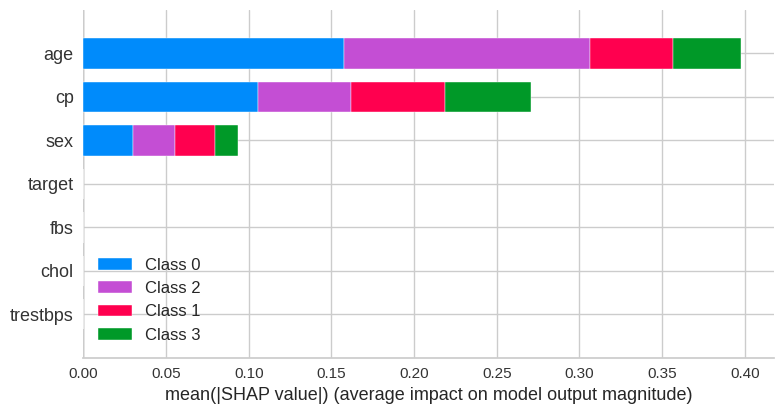

In [ ]:
explainer = shap.TreeExplainer(tuned_rf_pca)

shap_values = explainer.shap_values(data)

shap.summary_plot(shap_values, data)

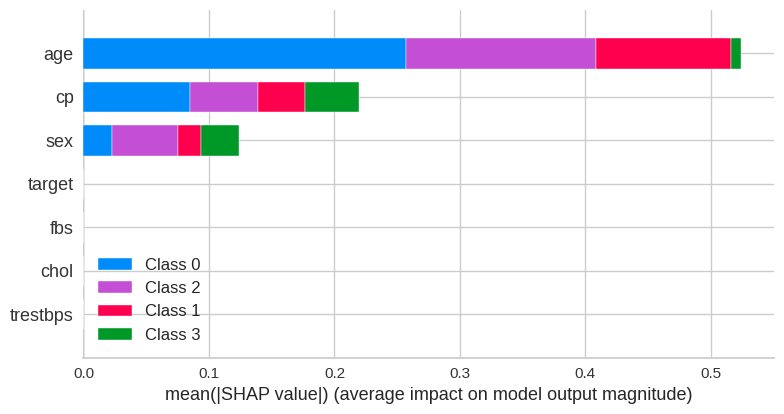

In [ ]:

explainer = shap.TreeExplainer(tuned_et_pca)

shap_values = explainer.shap_values(data)

shap.summary_plot(shap_values, data)

In [ ]:
selected_data = data.iloc[:, :3]
background_data = selected_data.sample(100, random_state=0)

  0%|          | 0/100 [00:00<?, ?it/s]

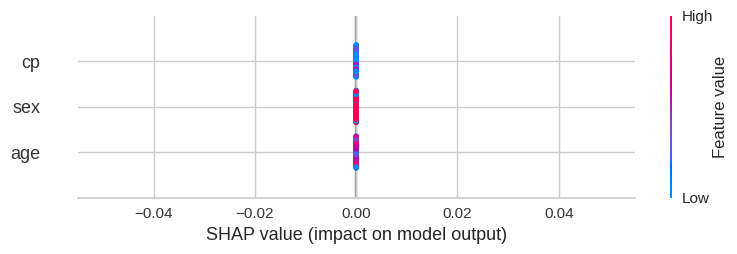

In [ ]:
# Create the KernelExplainer using the preprocessed background data
explainer = shap.KernelExplainer(tuned_lr_pca.predict, background_data)

shap_values = explainer.shap_values(background_data)

shap.summary_plot(shap_values, background_data)